In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 
os.chdir('/Users/microwave/AIO_2024/Module_4/Week2')

In [2]:
data = np.genfromtxt('advertising.csv', delimiter=',',skip_header=1)

N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

def mean_normalization(X):
    N = len(X)
    maxi = np.max(X, axis=0)
    mini = np.min(X, axis=0)
    avg = np.mean(X, axis=0)
    X = (X - avg)/ (maxi - mini)
    X_b = np.c_[np.ones((N,1)), X]
    return X_b, maxi, mini, avg 

X_b, maxi, mini, avg = mean_normalization(X)

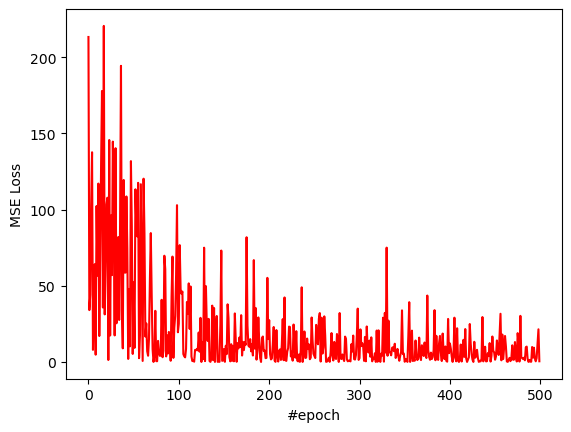

In [3]:
def stochastic_gradient_descent(X_b, y, n_epochs = 50, lr =0.00001):
    thetas = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            y_pred = np.dot(xi, thetas)

            loss = (y_pred - yi) ** 2 / 2

            gradient = xi.T.dot(y_pred - yi)

            thetas = thetas - lr * gradient

            thetas_path.append(thetas)
            losses.append(loss)
    return thetas_path, losses

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs = 50, lr =0.01)

x_axis = list(range(500))
plt.plot(x_axis, np.array(losses[:500]).flatten(), color = 'r')
plt.xlabel('#epoch')
plt.ylabel('MSE Loss')
plt.show()

In [4]:
sgd_theta,losses = stochastic_gradient_descent(X_b , y , n_epochs =1 , lr=0.01)
print(np.sum(losses))

7315.9445232320395


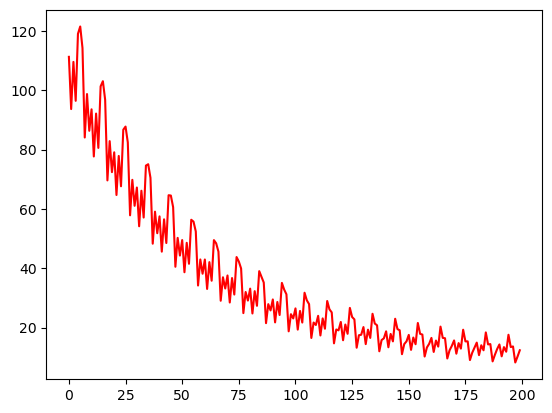

In [5]:
def mini_batch_gradient_descent(X_b, y, n_epochs = 50, minibatch_size = 20, lr =0.00001):
    thetas = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
            132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
            185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
            165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
            169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
            77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
            195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
            92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
            174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
            129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
            168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
            133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
            154])
        
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            y_pred = np.dot(xi, thetas)

            loss = (y_pred - yi) ** 2 / 2

            gradient = xi.T.dot(y_pred - yi) / minibatch_size

            thetas = thetas - lr * gradient

            thetas_path.append(thetas)
            losses.append(np.mean(loss))

    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, lr=0.01)
x_axis = list(range(200))
plt.plot(x_axis , losses[:200] , color ="r")
plt.show()


In [6]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, lr=0.01)
print(round(sum(losses),2))

9916.9


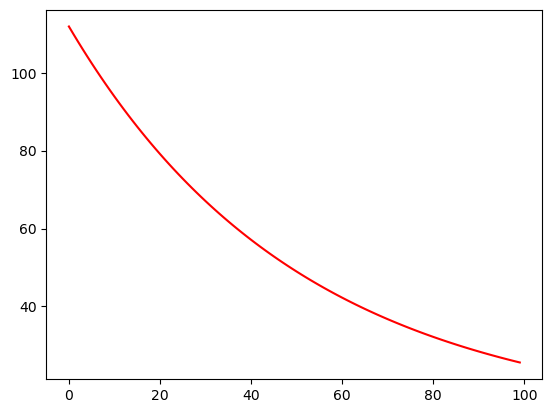

In [7]:
def batch_gradient_descent(X_b, y, n_epochs = 100, lr =0.01):
    thetas = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])

    thetas_path = [thetas]
    losses = []


    for epoch in range(n_epochs):
        y_pred = np.dot(X_b, thetas)

        loss = (y_pred - y) ** 2 / 2

        gradient = X_b.T.dot(y_pred - y) / N

        thetas = thetas - lr * gradient

        thetas_path.append(thetas)
        losses.append(np.mean(loss))

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, lr=0.01)
x_axis = list(range(100))
plt.plot(x_axis , losses[:100] , color ="r")
plt.show()


In [8]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, lr=0.01)
print(round(sum(losses),2))

5571.73


In [9]:
df = pd.read_csv('BTC-Daily.csv')

df = df.drop_duplicates()

In [10]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

unique_years = df['date'].dt.year.unique()


2014-11-28 to 2022-03-01


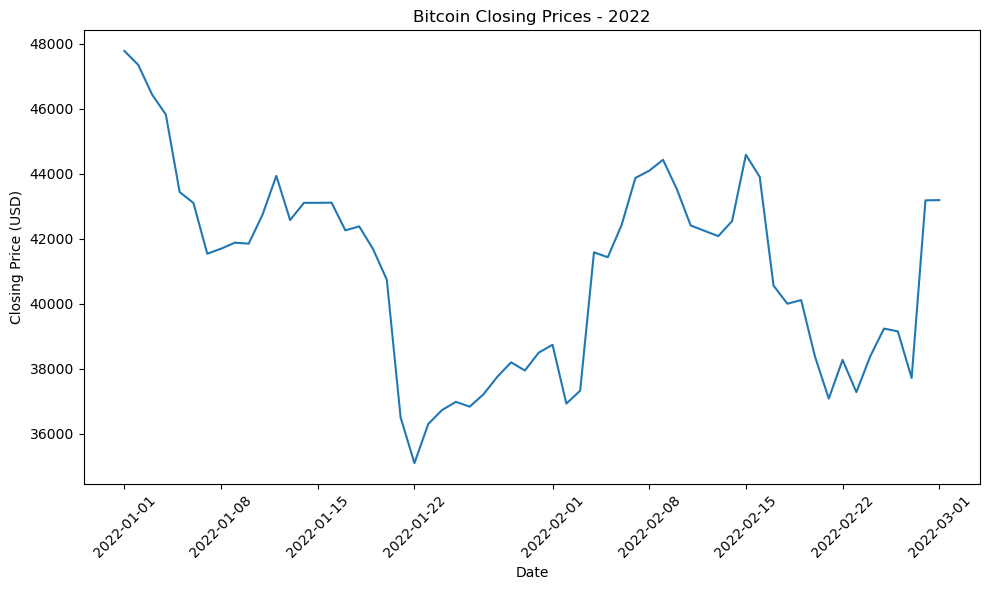

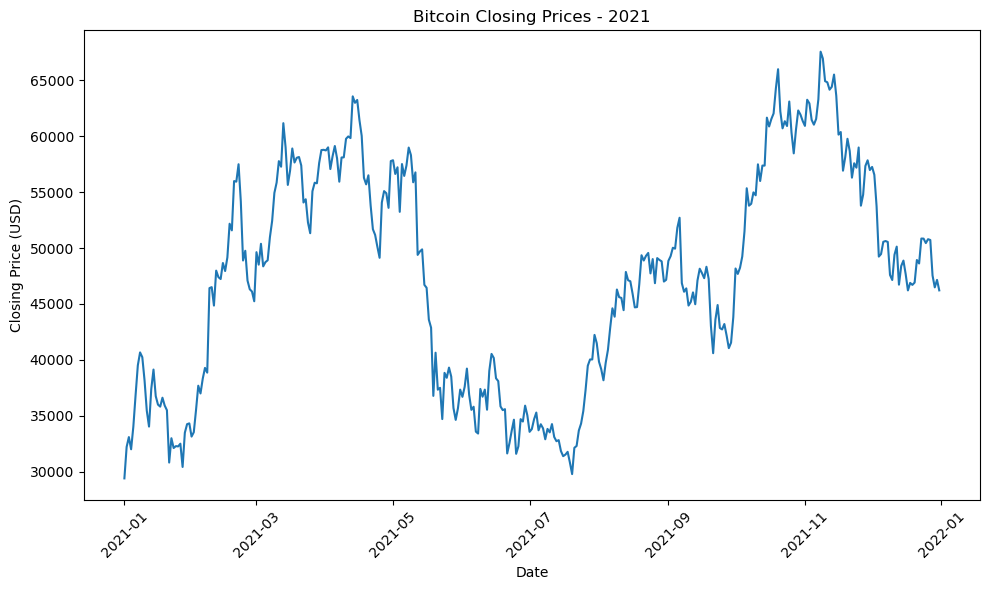

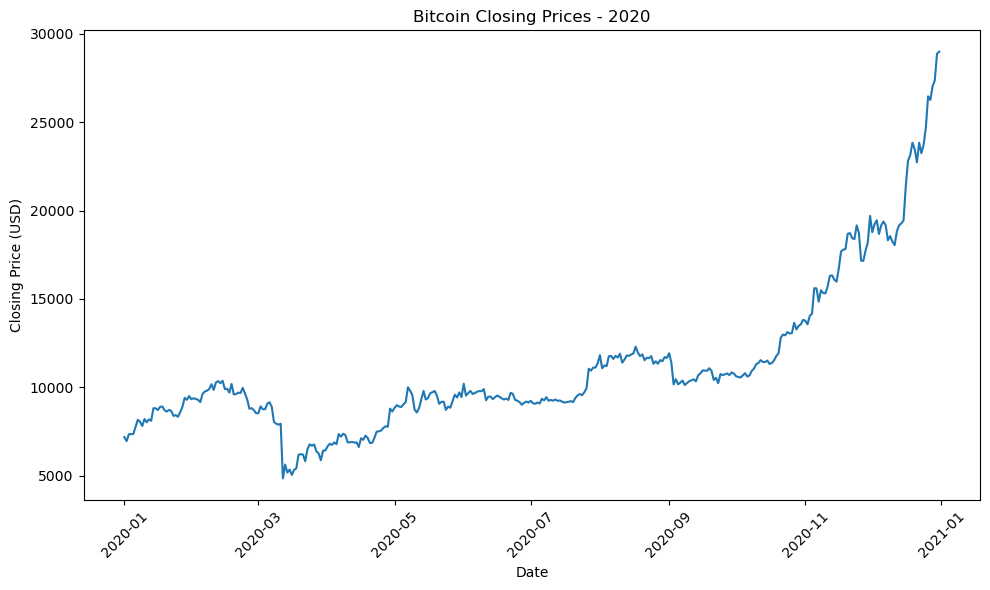

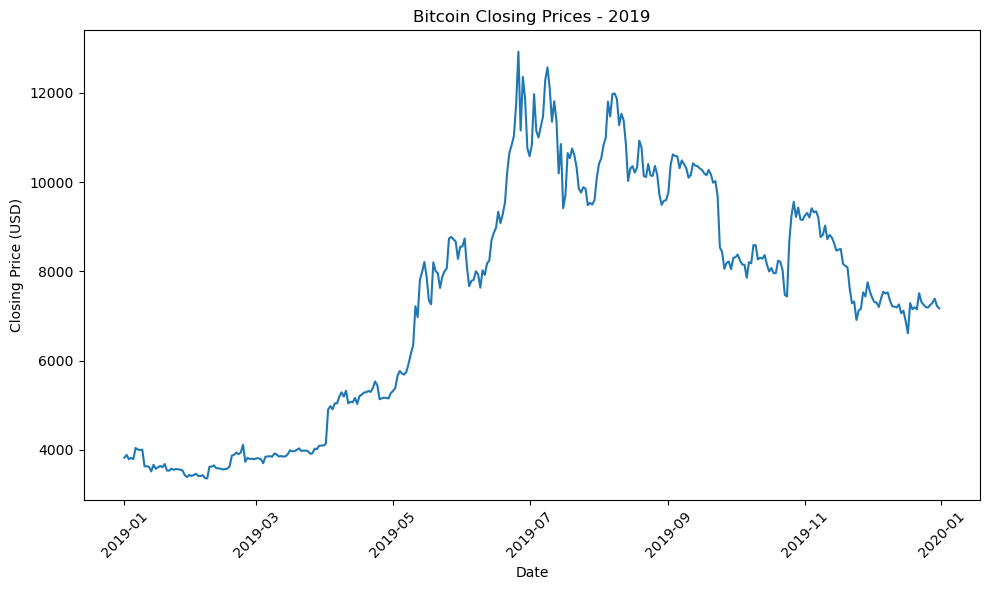

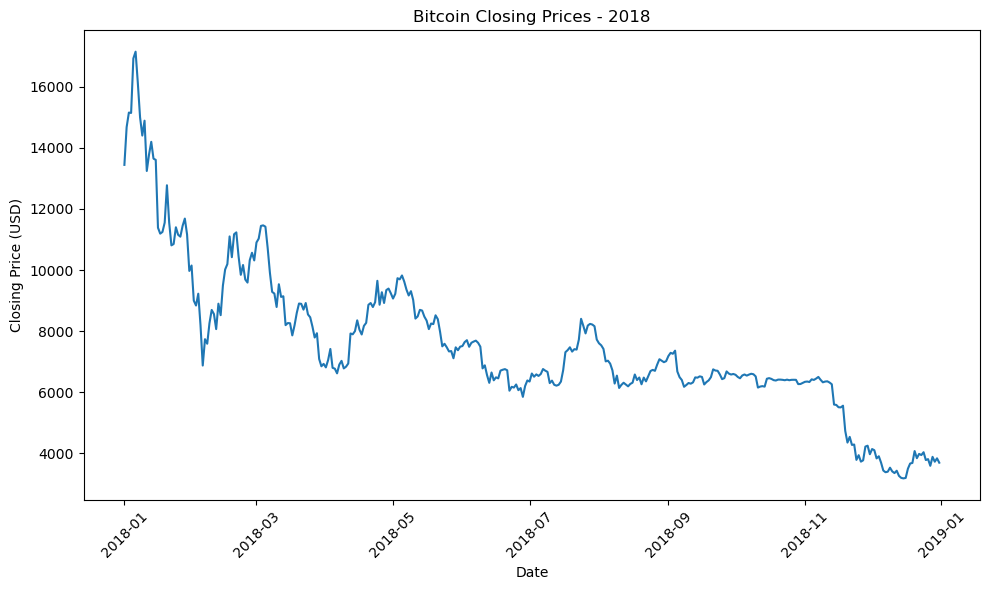

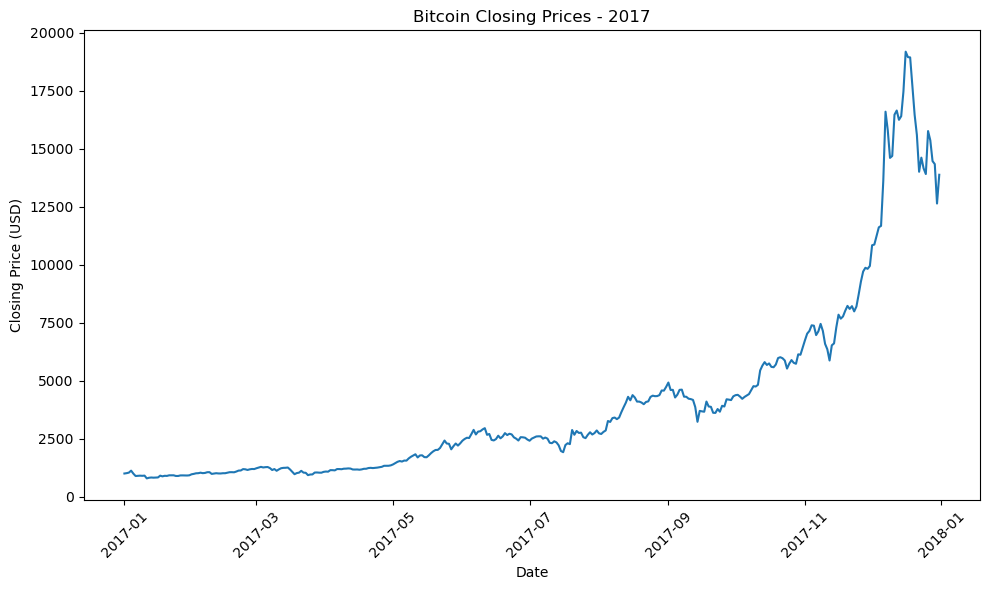

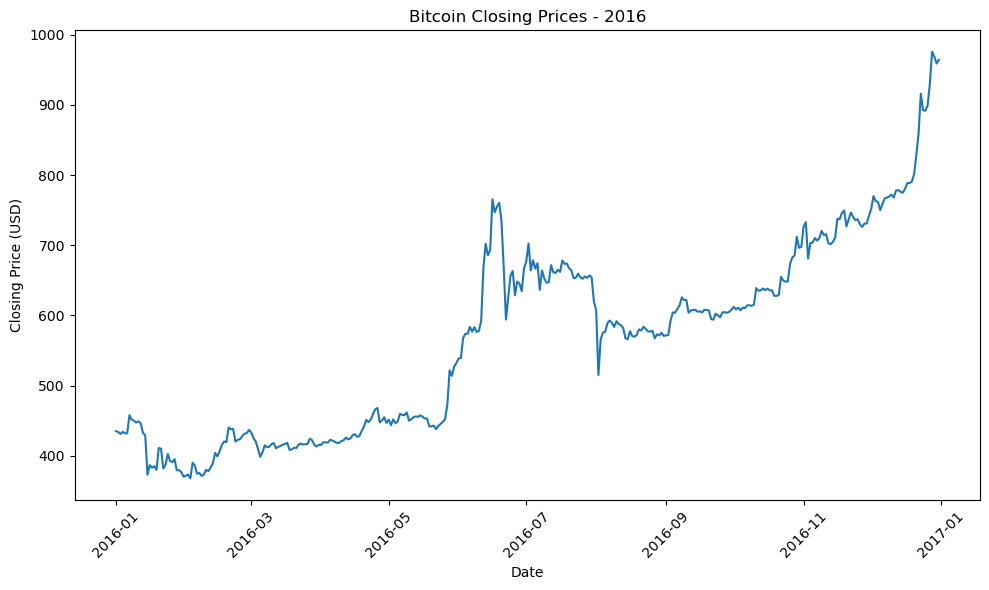

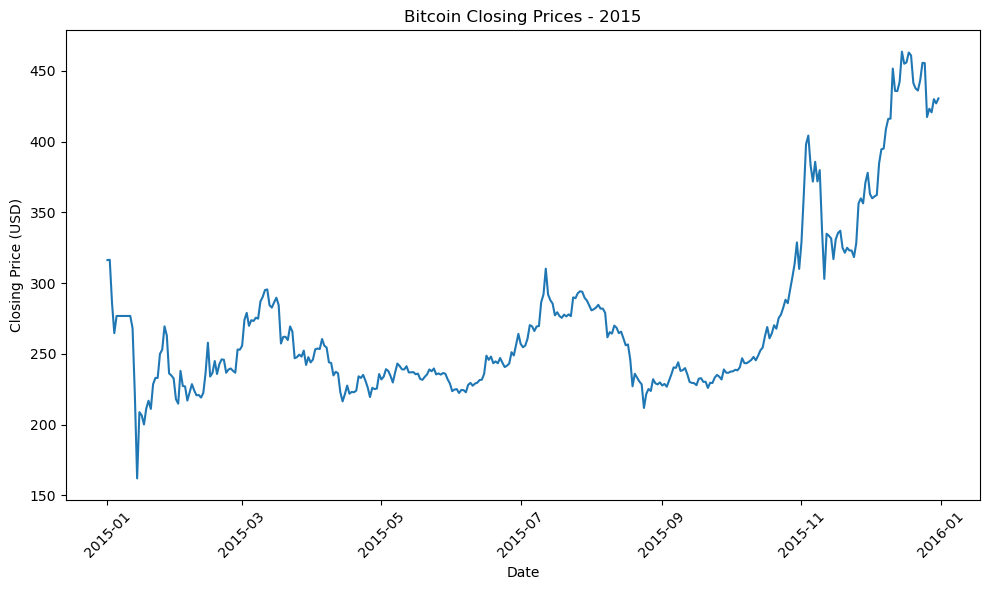

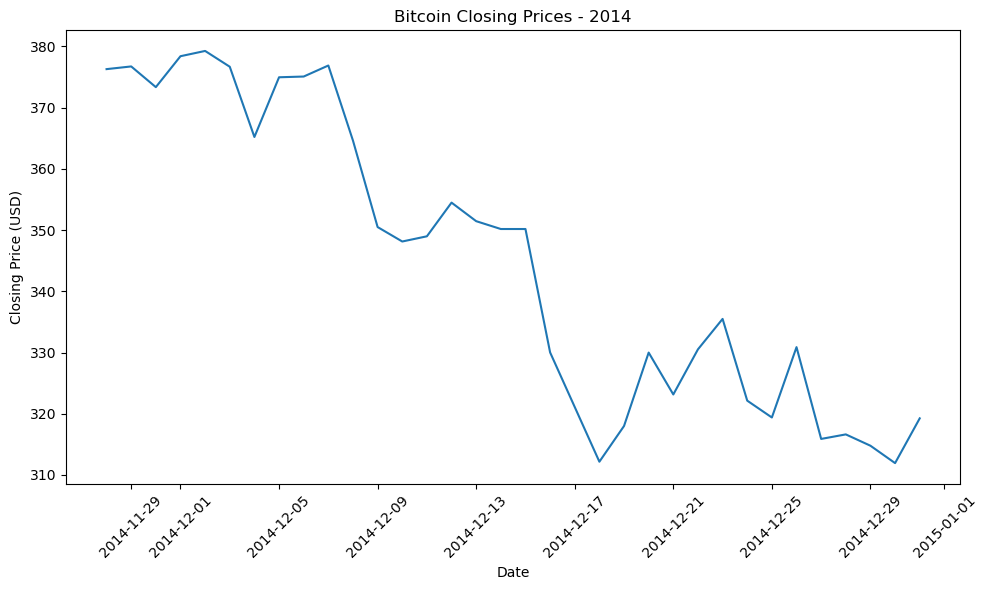

In [11]:
for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    
    plt.figure(figsize=(10, 6))
    plt.plot(year_data['date'], year_data['close'])  
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


2014-11-28 to 2022-03-01


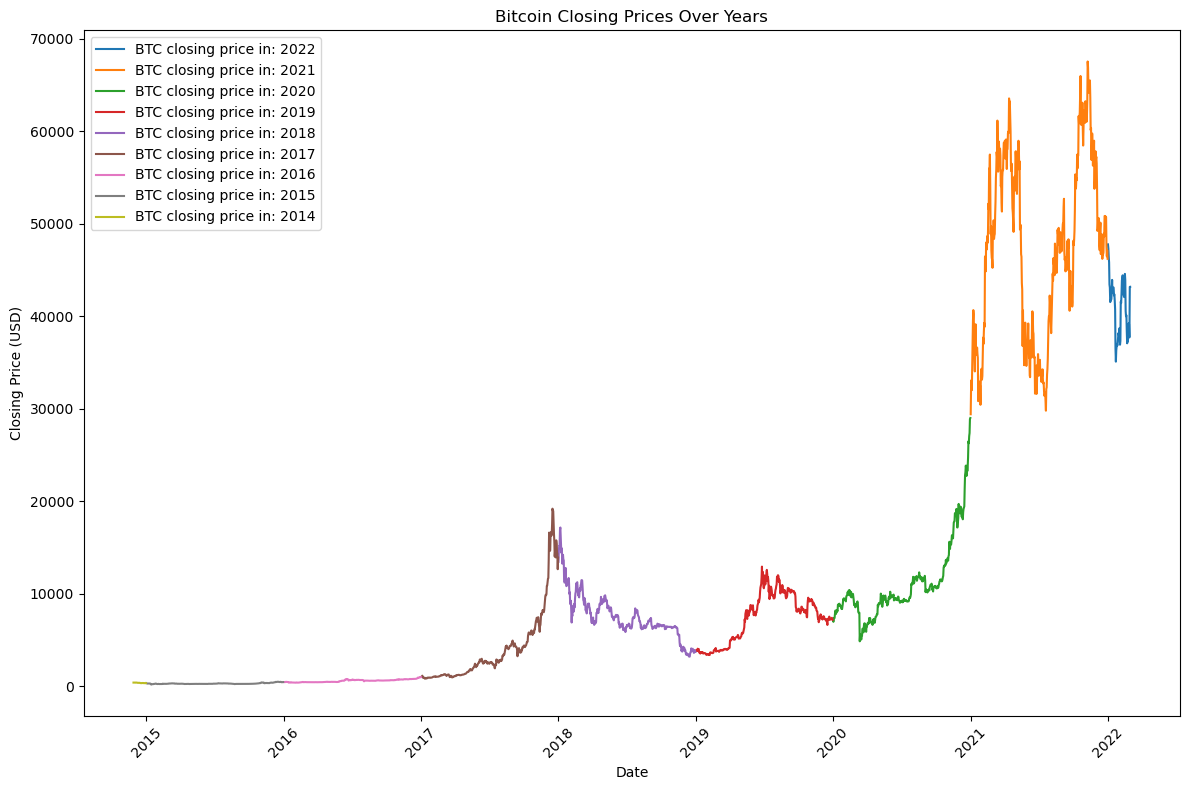

In [12]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

unique_years = df['date'].dt.year.unique()

plt.figure(figsize=(12, 8))

for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    plt.plot(year_data['date'], year_data['close'], label=f'BTC closing price in: {year}')

plt.title('Bitcoin Closing Prices Over Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_60574/2610720756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


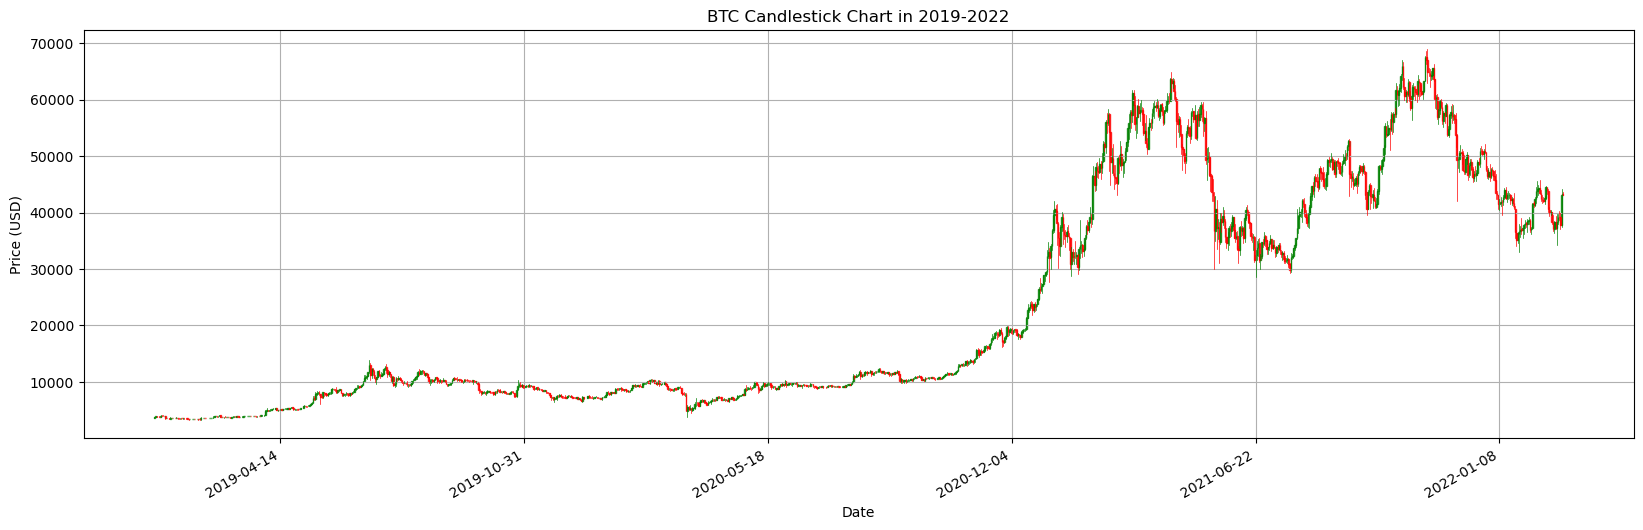

In [14]:
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('BTC Candlestick Chart in 2019-2022')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [15]:
def predict(X,w,b):
    y_pred = np.dot(X,w) + b
    return y_pred

def gradient(y_hat,y, x ):
    loss = (y_hat - y) ** 2 
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss * 2)/ (2*len(y))
    return (dw,db,cost)

def update_weight(w,b,lr,dw,db):
    w = w - lr * dw
    b = b - lr * db
    return (w,b)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scalar_obj = StandardScaler()

X = df_filtered[['open', 'high', 'low', 'close']].values
y = df_filtered['close'].values

X = scalar_obj.fit_transform(X)
y = scalar_obj.fit_transform(y.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




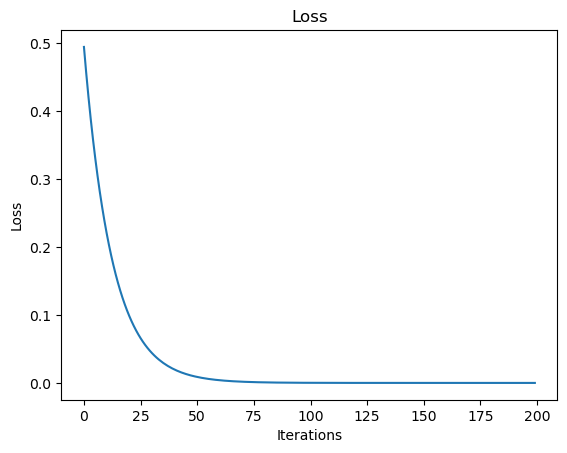

In [43]:
def linear_regression_vectorized(X, y, lr=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Fix: Initialize w as an array
    b = 0
    losses = []
    
    y = y.flatten()  # Ensure y is a 1-dimensional array
    
    for i in range(num_iterations):
        y_pred = predict(X,w,b)

        loss = np.mean((y_pred - y)**2) / 2

        dw = np.dot(X.T, (y_pred - y)) / n_samples
        db = np.mean(y_pred - y)

        w = w - lr * dw
        b = b - lr * db

        losses.append(loss)

    return w, b, losses


w,b,losses = linear_regression_vectorized(X_train,y_train,lr = 0.01, num_iterations = 200)

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [45]:
from sklearn.metrics import r2_score

y_pred = predict(X_test,w,b)

rmse = np.mean(np.abs(y_pred - y_test))

mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

y_train_pred = predict(X_train,w,b)
train_accu = r2_score(y_train, y_train_pred)
test_accu = r2_score(y_test, y_pred)


print(f"Training Accuracy: {train_accu}")
print(f"Test Accuracy: {test_accu}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

Training Accuracy: 0.9990718479687609
Test Accuracy: 0.9992220758347763
RMSE: 1.0997206831879747
MAPE: 215.9082352958685


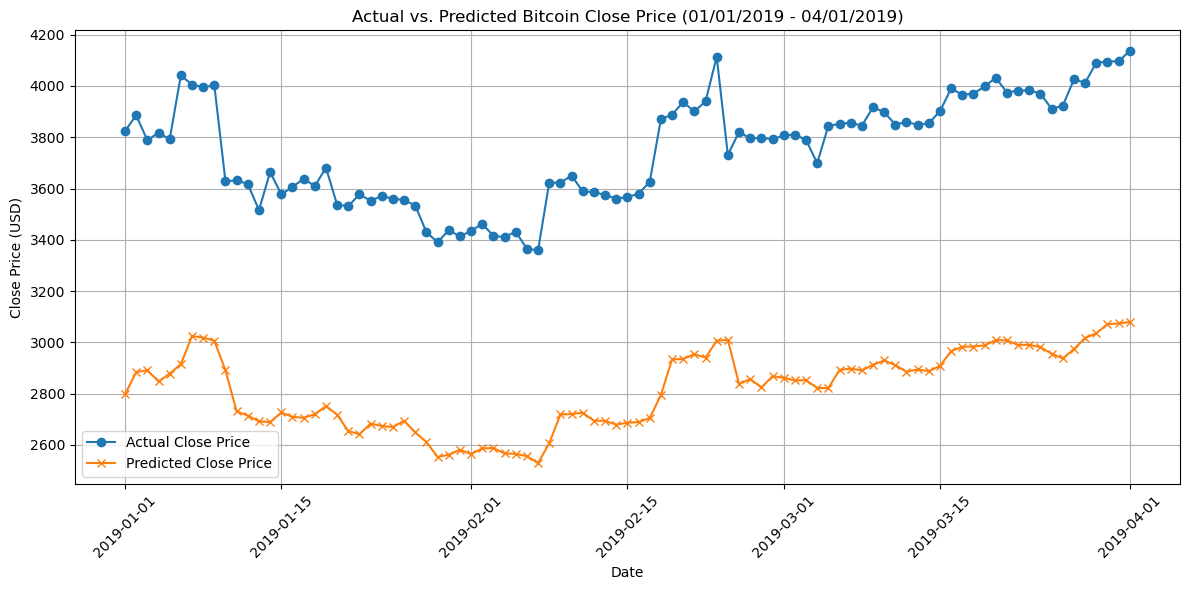

In [51]:

df_2019_q1 = df[(df["date"] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
X_2019_q1 = np.c_[np.ones((X_2019_q1.shape[0], 1)), X_2019_q1]  # Add a column of ones
y_2019_q1_actual = df_2019_q1["close"]

y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1["date"], y_2019_q1_actual, label="Actual Close Price", marker='o')
plt.plot(df_2019_q1["date"], y_2019_q1_pred, label="Predicted Close Price", marker='x')
plt.title("Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()